<h1 align='center'>Iris Plant Data Modeling</h1>
<h4 align='center'>by Wilfred Morgan</h4>

## Problem Description:
Predict the flower class based on available attributes.

In [2]:
from IPython.display import IFrame

In [27]:
# Flower Classification
IFrame('http://www.spataru.at/iris-dataset-svm/iris_types.jpg', width=1280, height=300)

### Problem assumptions:
* Data is accurate
* No missing values
* Data is or can be in a format to be used for machine learning.

### Similar problems:
* Classifying other floral species
* Classifying cancer cells

## Basic Information
* Number of observations: **150**
* Number of features: **4**
* Data types of features: **Numerical**
* Target variable: **class** *(Categorical)*

### Peek at the Data

In [8]:
# Import Libaries
import pandas as pd
import numpy as np

In [9]:
# Import Data
data_location = "/Users/wmemorgan/Google Drive/Computer_Data_Science_Lab/iris_data_modeling/data/02_prepared_data/iris.data" 
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(data_location, names=names)

In [29]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Class Distribution

In [11]:
print(data.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Other Observations
* No missing data or corrupted data
* Sepal length and petal length variables had the strongest correlation with class.

In [12]:
# Import Libaries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

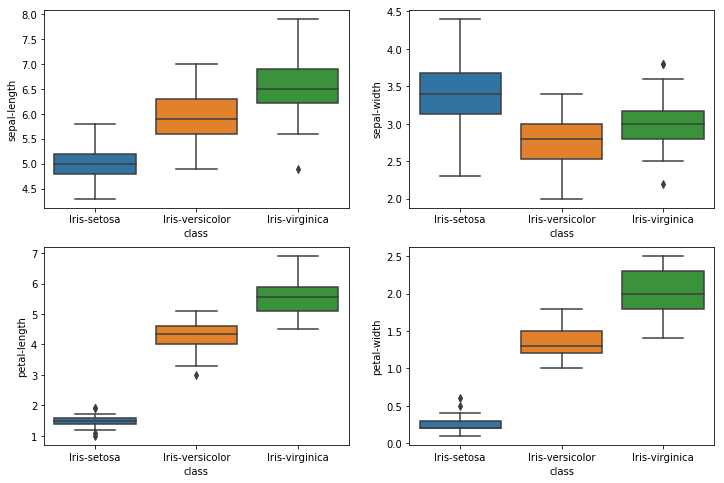

In [14]:
f, axes = plt.subplots(2, 2, figsize=(12,8)) #More than one dimension

bp1 = sns.boxplot(data=data, x="class", y="sepal-length", ax=axes[0,0])
bp2 = sns.boxplot(data=data, x="class", y="sepal-width", ax=axes[0,1])
bp3 = sns.boxplot(data=data, x="class", y="petal-length", ax=axes[1,0])
bp4 = sns.boxplot(data=data, x="class", y="petal-width", ax=axes[1,1])

## Model Evaluation and Selection
* Selected a mix of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. 
* Used k-fold cross-validation (CV) procedure to evaluate the accuracy score of each algorithm.
* Identified k-Nearest Neighbor (k-NN) as the best algorithm to use for modeling this dataset. 
* **NOTE: Used default parameters for KNNClassifier module**

In [21]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [32]:
# Import library
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Assign features and output
X = data.drop('class',axis=1)
y = data['class']
test_size = 0.2
seed = 7

In [16]:
# Create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=seed)

In [31]:
# Import Algorithm Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score

## Algorithm Evaluation

In [22]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


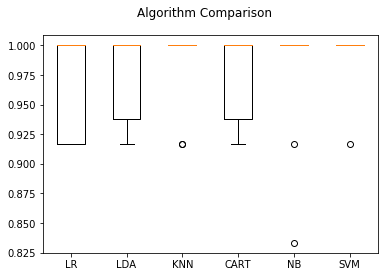

In [23]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [30]:
# Fitting the classifier to the Training set
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

## Results
* Prediction model has an accuracy of 90%
* **Success Factors:**
    * High quality data (no corrupt or missing data)
    * k-fold CV for determining the best model

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Accuracy Summary

In [26]:
print('Accuracy Score:')
print(accuracy_score(y_test,predictions))
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('Classification Report:')
print(classification_report(y_test,predictions))

Accuracy Score:
0.9
Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



## Conclusion
* Include k-fold CV procedures for supervised classification modeling.
* Will use similar methodology for regression and clustering modeling.

<h1 align='center'>THANK YOU</h1>